# HarvestStat Data Profiling - Angola

In [1]:
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import geopandas as gpd
from tools import retreive_fdw_data, save_npz, PrintAdminUnits, PlotAdminShapes
from tools import FDW_PD_Sweeper, FDW_PD_AvalTable, FDW_PD_Compiling, FDW_PD_ValidateFnidName
from tools import FDW_PD_CreateAdminLink, FDW_PD_RatioAdminLink, FDW_PD_ConnectAdminLink
from tools import product_name_mapping, FDW_PD_CaliSeasonYear, FDW_PD_MergeCropProductionSystem
from tools_graphic import PlotBarProduction, PlotLinePAY
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

In [2]:
# Set loading parameters ------------------------ #
country_name = 'Angola'
country_iso2 = 'AO'
use_api_data = False
requires_authentication = False
# ----------------------------------------------- #

# Load FEWS NET administrative boundaries ------- #
epsg = 'EPSG:32733'
fn_shapes = sorted(glob.glob(f"../data/shapefile/fewsnet/{country_iso2}_Admin?_????.shp"))
shape_all = []
for fn in fn_shapes:
    name = fn[-18:-4]
    exec('%s = gpd.read_file("%s").to_crs("%s")' % (name, fn, epsg))
    exec('%s["area"] = %s["geometry"].area/10**6' % (name, name))
    exec('shape_all.append(%s)' % (name))
shape_all = pd.concat(shape_all, axis=0).reset_index(drop=True)
# PrintAdminUnits(shape_all)
# ----------------------------------------------- #

# Load FDW data -------------------------------- #
df = retreive_fdw_data(country_name, country_iso2, use_api_data, requires_authentication)
# ----------------------------------------------- #

Data is loaded from the local file.
../data/crop_raw_data/adm_crop_data_raw_AO.csv is loaded.


In [3]:
# Manual Pre-processing before Sweeping --------- #
# 1. Default setting 
# a) None-type crop production system
df.loc[df['crop_production_system'].isna(), 'crop_production_system'] = 'none'
df.loc[df['crop_production_system'] == '', 'crop_production_system'] = 'none'
# b) None-type population group
df.loc[df['population_group'].isna(), 'population_group'] = 'none'
df.loc[df['population_group'] == '', 'population_group'] = 'none'
# ----------------------------------------------- #

# FDW Production Data Inspection ---------------- #
df, df_raw = FDW_PD_Sweeper(df, area_priority="Area Planted")
table_dict = FDW_PD_AvalTable(df, shape_all)
# ----------------------------------------------- #

# FEWS NET Shapefile comparison ----------------- #
shape_used = pd.concat([AO_Admin1_2008], axis=0)
PlotAdminShapes(shape_used, label=True)
# ----------------------------------------------- #

- Remove missing records ---------------------- #
Orignial data points: 14,468
Removed 1,041 "Missing Value" points
2,732/3,617 "Area Harvested" points are retained.
3,576/3,617 "Area Planted" points are retained.
3,580/3,617 "Quantity Produced" points are retained.
3,539/3,617 "Yield" points are retained.
Current data points: 13,427

- Minor changes are applied ------------------- #

- Basic information --------------------------- #
Data period: 1997 - 2017
29 grain types are found: Avocado (unspecified), Banana (unspecified), Beans (mixed), Cabbage (Unspecified), Carrots, Cassava, Chili pepper (Unspecified), Coffee (unspecified), Cowpeas (Mixed), Garlic (dry), Green bean (fresh), Groundnuts (In Shell), Lemon (unspecified), Maize (Corn), Mango (unspecified), Melon (unspecified), Millet, Millet (Pearl), Okras (Fresh), Onions, Pineapple (unspecified), Potato (Irish), Rice (Paddy), Sorghum, Soybean (unspecified), Sweet Potatoes, Tomato, Watermelon, Wheat Grain
1 seasons are found: Main (

season_name                  Main
                                 
Avocado (unspecified)        0.1%
Banana (unspecified)        13.5%
Beans (mixed)                1.5%
Cabbage (Unspecified)        0.4%
Carrots                      0.2%
Cassava                     58.3%
Chili pepper (Unspecified)   0.0%
Coffee (unspecified)         0.1%
Cowpeas (Mixed)              0.0%
Garlic (dry)                 0.0%
Green bean (fresh)           0.0%
Groundnuts (In Shell)        0.9%
Lemon (unspecified)          0.4%
Maize (Corn)                 9.4%
Mango (unspecified)          0.2%
Melon (unspecified)          0.0%
Millet                       0.1%
Millet (Pearl)               0.5%
Okras (Fresh)                0.0%
Onions                       0.7%
Pineapple (unspecified)      0.9%
Potato (Irish)               3.9%
Rice (Paddy)                 0.1%
Sorghum                      0.3%
Soybean (unspecified)        0.1%
Sweet Potatoes               7.6%
Tomato                       0.8%
Watermelon    

- Recorded years per season ------------------- #


Main: 21 years (1997-2017) (missing: 0 years)

- Number of "Quantity Produced" data points --- #
AO2008A1: 3,580 data points are found.

- Districts with population group(s) ---------- #
0 districts includes 'population_group'.

Table of available data


----------------------------------------------- #
Crop type: Avocado (unspecified)
----------------------------------------------- #
season_name                       Main                 
crop_production_system Commercial (PS) Small-scale (PS)
fnid_short                      2008A1           2008A1
year                                                   
2015                              2/18             5/18
2016                              2/18             5/18
2017                              1/18             2/18
----------------------------------------------- #
Crop type: Banana (unspecified)
----------------------------------------------- #
season_name                       Main                 
crop_production_system Commercial (PS) Small-scale (PS)
fnid_short                      2008A1           2008A1
year                                                   
2007                               NaN            15/18
2008                               NaN            13/18
2009   

../figures/AO_admin_shapes.png is saved.


- Angola crop seasonal calendar

<img src="../figures/crop_calendar/seasonal-calendar-angola.png" width=900><br>

<img src="../figures/crop_calendar/safrica_ao_calendar.png" width=900>

- comparison of boundaries</br>

<img src="../figures/AO_admin_shapes.png" width=900>

- In Angola, basd on the FEWS NET data, there were zero times of changes in administrative units. We will use the 2008 administrative units

| year	 | Admin1   | # units   | Admin2   | # units   |
| :---: | :----:  | :----:   | :----:   | :---:  |
| 2008	 | AO2008A1 | 18	| AO2008A2	| 160	|

- The data is all reported in a single `Main (02-01)` season
- The data is available at admin level 1

In [4]:
# Define the latest shapefile ------------------- #
latest_level = 1
shape_latest = AO_Admin1_2008.copy().to_crs('epsg:32733')
# ----------------------------------------------- #

# Validation of FNIDs and Names ----------------- #
df = FDW_PD_ValidateFnidName(df, shape_used, shape_latest)
# ----------------------------------------------- #

# FDW Production Data Compiling ----------------- #
area, prod = FDW_PD_Compiling(df, shape_used)
# Drop "Commercial (PS)" CPS and merge all CPSs into "All (PS)"
area_new, prod_new = FDW_PD_MergeCropProductionSystem(area, prod, cps_remove=['Commercial (PS)'], cps_final='All (PS)')
df['crop_production_system'] = 'All (PS)'
# ----------------------------------------------- #

In [5]:
# Manual correction ----------------------------- #
crop_new = prod_new/area_new
# ----------------------------------------------- #

# Complete long format DataFrame ---------------- #
df_area = area_new.T.stack().rename('value').reset_index()
df_area['indicator'] = 'area'
df_prod = prod_new.T.stack().rename('value').reset_index()
df_prod['indicator'] = 'production'
df_yield = (prod_new/area_new).T.stack().rename('value').reset_index()
df_yield['indicator'] = 'yield'
stack = pd.concat([df_area, df_prod, df_yield], axis=0)
# Add "planting year"
cols = ['season_name','product','crop_production_system','planting_month','harvest_year','harvest_month','planting_year']
season_table = df[cols].drop_duplicates()
stack = stack.merge(season_table, on=cols[:-1])
# Add country and admin names
stack = stack.merge(df[['fnid','country','country_code','admin_1','admin_2']].drop_duplicates(), on='fnid', how='inner')
names = [
    'fnid','country','country_code','admin_1','admin_2','name',
    'product','season_name','planting_year','planting_month','harvest_year','harvest_month',
    'crop_production_system','indicator','value'
]
stack = stack[names]
# ----------------------------------------------- #

# Final Processing ------------------------------ #
# Product name mapping
stack = product_name_mapping(stack, list_except=None)
# Calibration of crop calendar using External Season Calendar (ESC)
esc = pd.read_csv('../data/crop_calendar/external_season_calendar.csv')
stack, link_ratio = FDW_PD_CaliSeasonYear(stack, esc, link_ratio=None)
# None admin names
stack.loc[stack['admin_1'].isna(), 'admin_1'] = 'none'
stack.loc[stack['admin_2'].isna(), 'admin_2'] = 'none'
# ----------------------------------------------- #

# Save data
fn_out = '../data/crop/adm_crop_production_AO.csv'
stack.to_csv(fn_out); print(f'{fn_out} is saved.')

All [country, season_name] are in the external season calendar.


../data/crop/adm_crop_production_AO.csv is saved.


# Visualization of production data

/Users/weston/Documents/Code/Project/HarvestStat/HarvestStat/notebook/tools_graphic.py:135: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axes[1].grid(which='minor', axis='x', linestyle='-', color='black', visible=False)


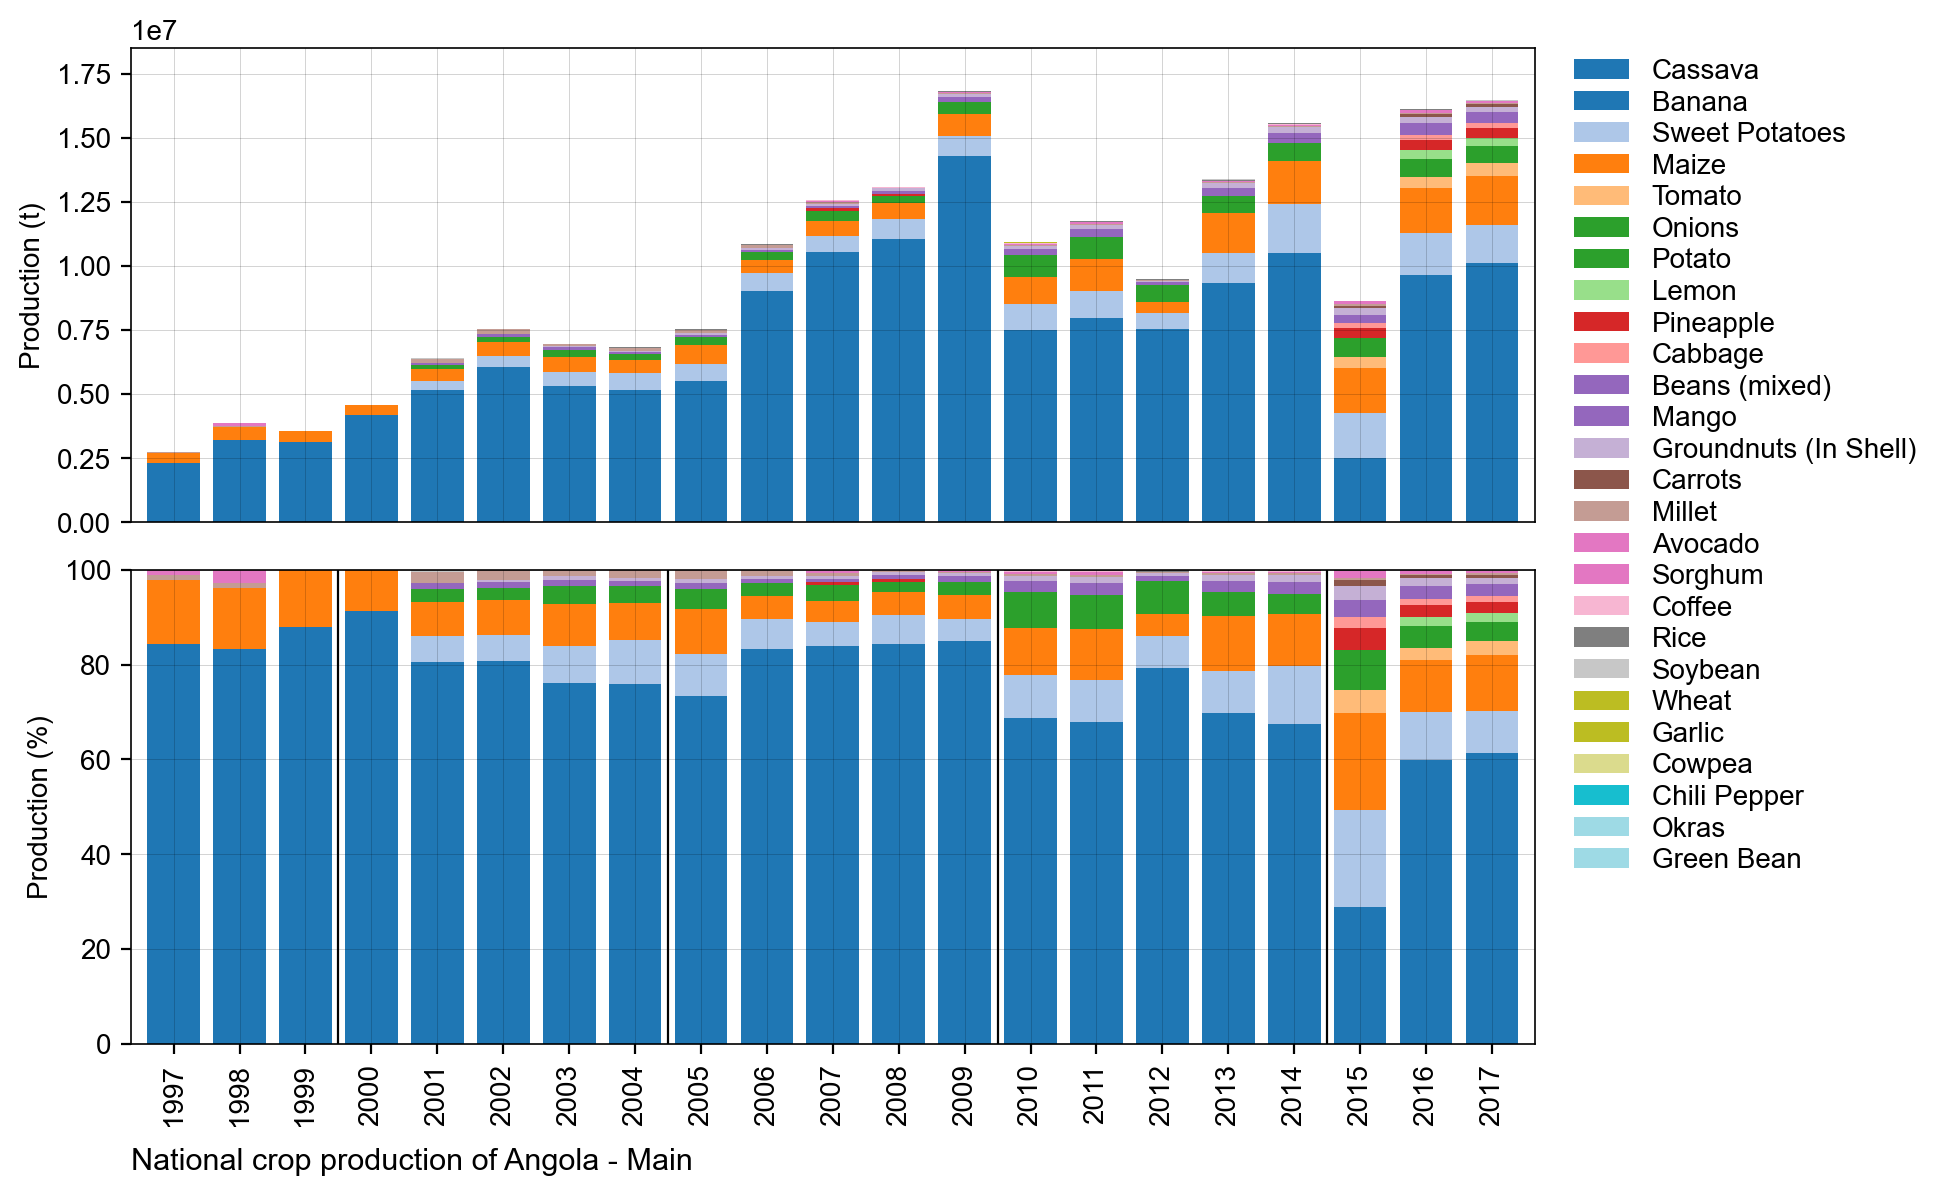

../figures/AO_bar_natgrainprod_Main.png is saved.


In [6]:
# Bar chart of national crop production
country_iso, country_name = 'AO', 'Angola'
df = pd.read_csv('../data/crop/adm_crop_production_%s.csv' % country_iso, index_col=0)
df['year'] = df['harvest_year']
year = [df['year'].min(), df['year'].max()]
for season_name in ['Main']:
    footnote = 'National crop production of %s - %s' % (country_name, season_name)
    fn_save = '../figures/%s_bar_natgrainprod_%s.png' % (country_iso, season_name)
    sub = df[df['season_name'] == season_name]
    PlotBarProduction(sub, year, footnote, fn_save)

No data to plot for Time-series of AO - Millet (Pearl) - Main.


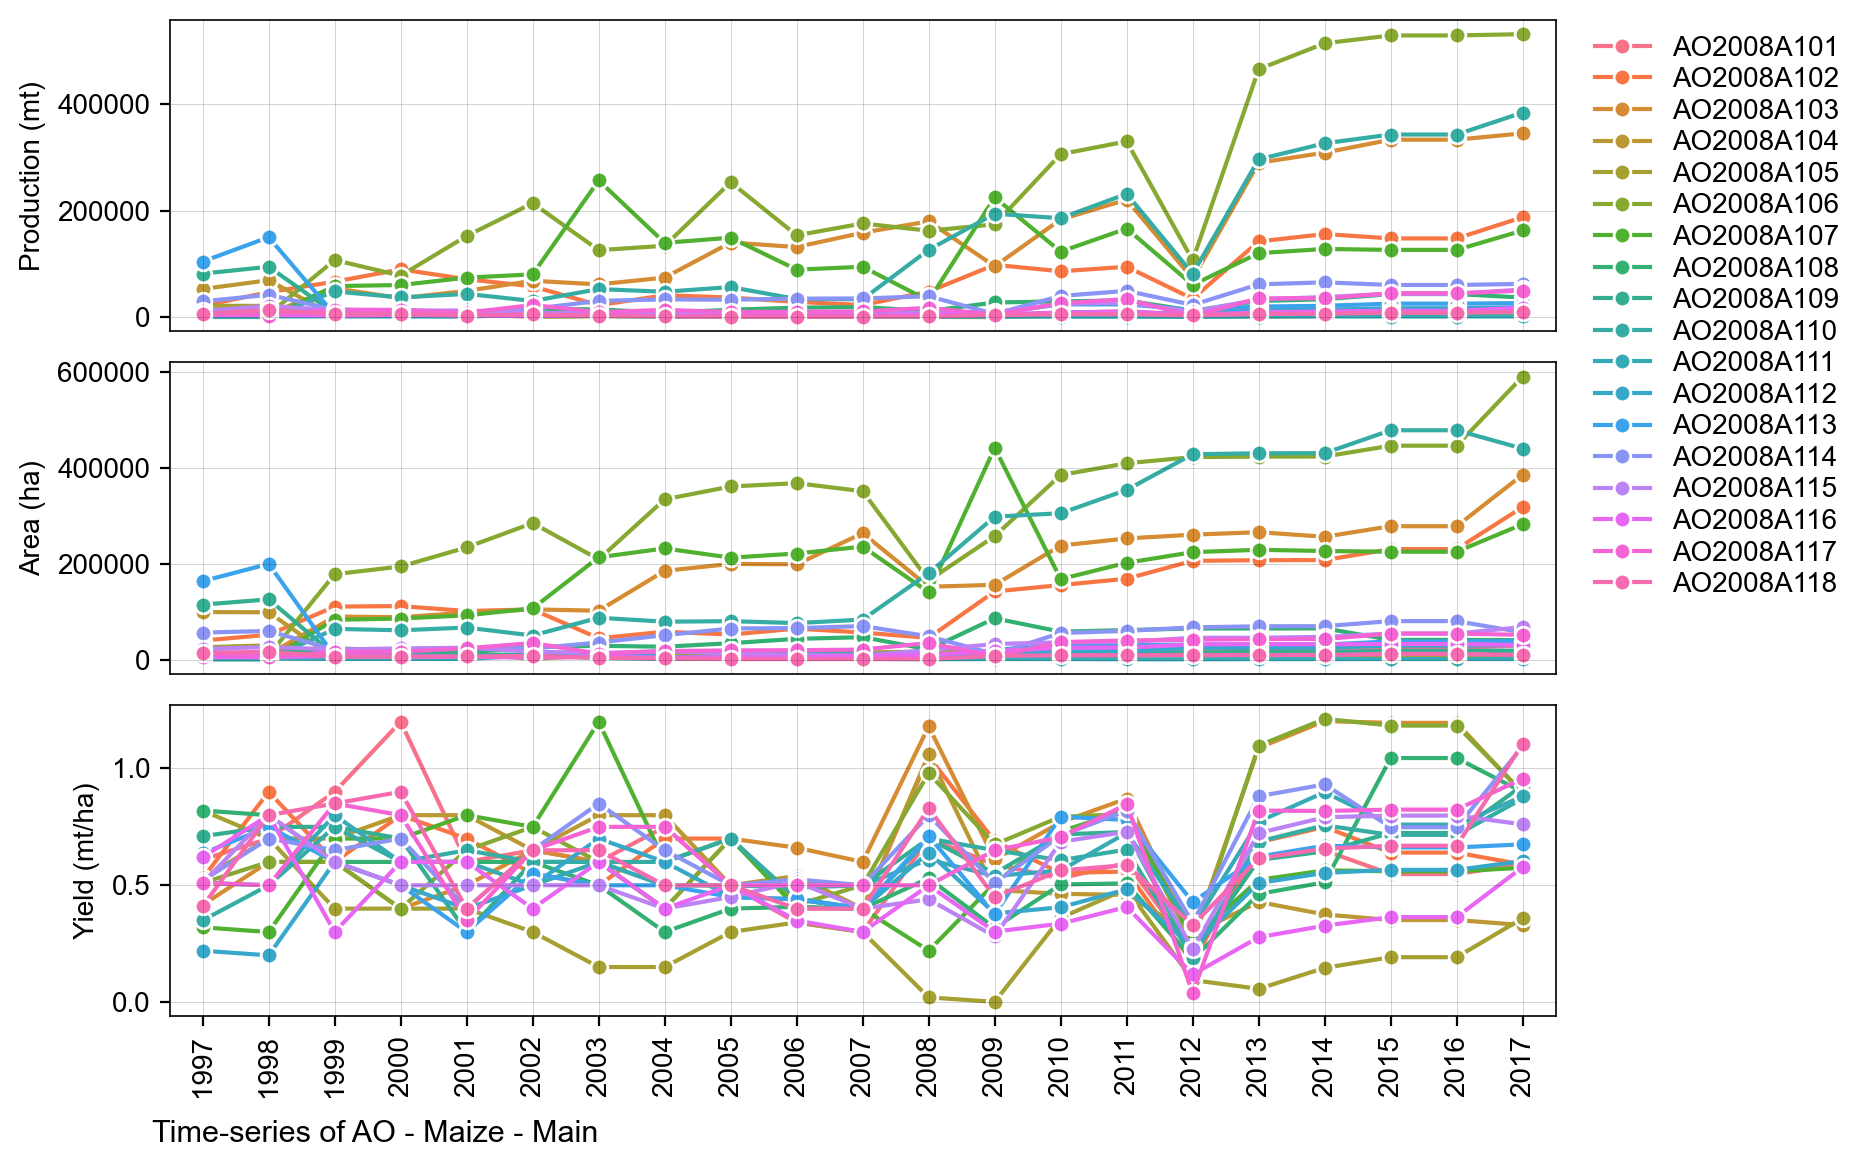

In [7]:
# Lineplot of Production-Area-Yield time-series
country_iso, country_name = 'AO', 'Angola'
df = pd.read_csv('../data/crop/adm_crop_production_%s.csv' % country_iso, index_col=0)
df['year'] = df['harvest_year']
year = [df['year'].min(), df['year'].max()]
product_season = [
    ['Millet (Pearl)','Main'],
    ['Sorghum','Main'],
    ['Maize','Main'],
    ['Rice','Main'],
]
for product_name, season_name in product_season:
    footnote = 'Time-series of %s - %s - %s' % (country_iso, product_name, season_name)
    fn_save = '../figures/%s_line_pay_%s_%s.png' % (country_iso, product_name, season_name)
    sub = df[(df['product'] == product_name) & (df['season_name'] == season_name)]
    PlotLinePAY(sub, year, footnote)